In [7]:
import gc
import h5py
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from sklearn import svm
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [12]:
L = 7   # number of particle
ls = 40 # the scale of division

In [9]:
projection_target = h5py.File('train_set_DMRG_target.hdf5', 'r')
gtrain = h5py.File('gram_train.hdf5' ,'r')['gram_train'][:]
gtest = h5py.File('gram_test.hdf5' ,'r')['gram_test'][:]

In [20]:
clf = svm.SVC(kernel='precomputed')
y = projection_target['DMRG_target'][:]
clf.fit(gtrain, y) 
y_pred = clf.predict(gtrain)

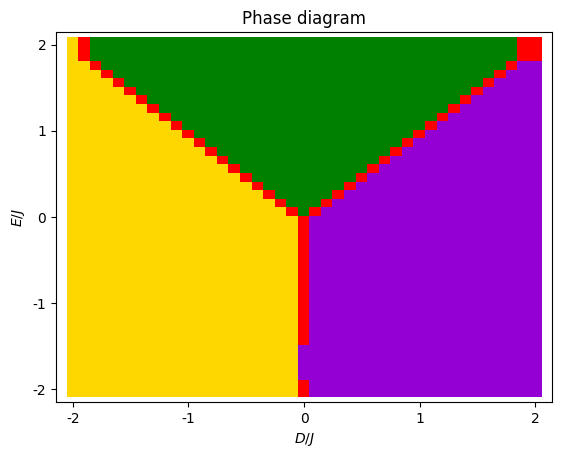

In [13]:
mat = y_pred.reshape(ls,ls) #   y = -1  Antiferromagnetic, y = 1  Paramagnetic, y = 0  SPT
r = mat.shape[0]
c = mat.shape[1]
dy = 4/r
dx = 4/c

for i in range(r):
    for j in range(c):
        if mat[i,j] == 0:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color = 'teal',s=300, edgecolors='none')
        elif mat[i,j] == 1:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2, marker = 's', color = 'darkviolet', s=300,  edgecolors='none')
        elif mat[i,j] == 2:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='gold',s =300,  edgecolors='none')
        elif mat[i,j] == 3:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='red',s =300,  edgecolors='none')
        elif mat[i,j] == 4:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='blue',s =300,  edgecolors='none')
        elif mat[i,j] == 5:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='green',s =300,  edgecolors='none')
        elif mat[i,j] == 6:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='black',s =300,  edgecolors='none')

plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.title('Phase diagram')
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.savefig('phase_diagram_DMRG_states.png')
plt.show()


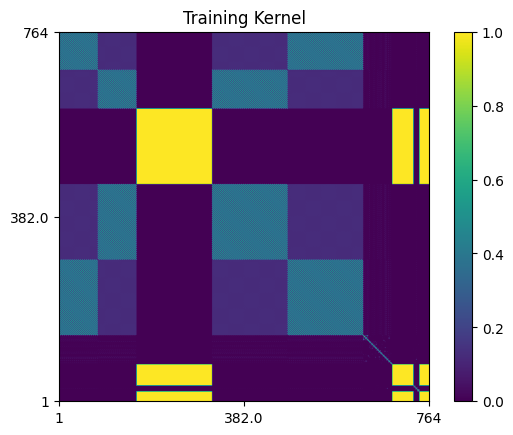

In [14]:
plt.imshow(gtrain,cmap="viridis");
d = gtrain.shape[0];
plt.xticks([-0.5, (d/2), (d)], [f"{1}", f"{(d/2)}", f"{(d)}"]);
plt.yticks([-0.5, (d/2), (d)], [f"{(d)}", f"{(d/2)}", f"{1}"]);
plt.title("Training Kernel")
plt.colorbar();
plt.savefig('Training Kernel DMRG state.png')
plt.show();

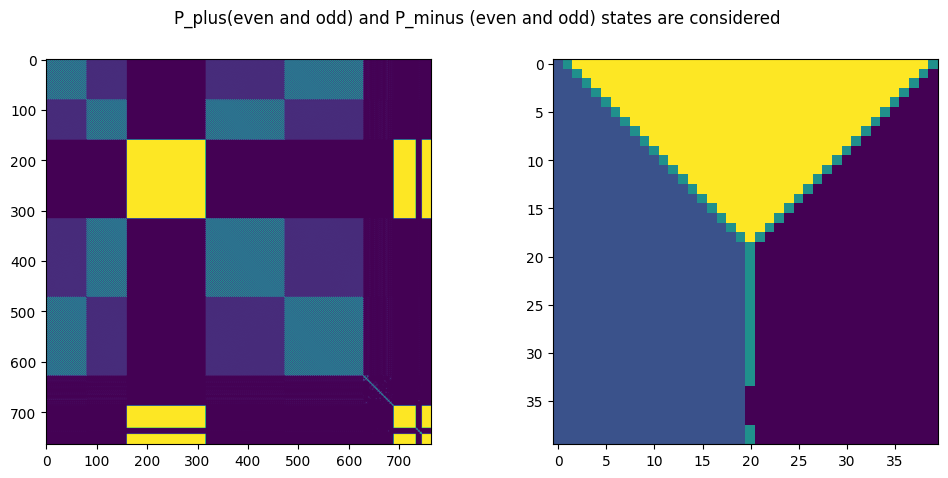

In [15]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].imshow(gtrain)
mat = y_pred.reshape(ls,ls)
ax[1].imshow(np.rot90(mat))

fig.suptitle('P_plus(even and odd) and P_minus (even and odd) states are considered')
plt.show()